In [20]:
## The imports 
import numpy as np
from PIL import Image 
import cv2
from matplotlib import pyplot as plt
import copy

In [3]:
#define Variables
IMAGE_PATH = 'Data/Q1/1.jpg'

In [21]:
# We need to read the images that are located in our files
Img = cv2.imread(IMAGE_PATH) 
Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)

In [61]:
def rgb2hsv(rgb):
    rgb = rgb.astype('float')
    maxv = np.amax(rgb, axis=2)
    maxc = np.argmax(rgb, axis=2)
    minv = np.amin(rgb, axis=2)
    minc = np.argmin(rgb, axis=2)
    hsv = np.zeros(rgb.shape, dtype='float')
    hsv[maxc == minc, 0] = np.zeros(hsv[maxc == minc, 0].shape)
    hsv[maxc == 0, 0] = (((rgb[..., 1] - rgb[..., 2]) * 60.0 / (maxv - minv + np.spacing(1))) % 360.0)[maxc == 0]
    hsv[maxc == 1, 0] = (((rgb[..., 2] - rgb[..., 0]) * 60.0 / (maxv - minv + np.spacing(1))) + 120.0)[maxc == 1]
    hsv[maxc == 2, 0] = (((rgb[..., 0] - rgb[..., 1]) * 60.0 / (maxv - minv + np.spacing(1))) + 240.0)[maxc == 2]
    hsv[maxv == 0, 1] = np.zeros(hsv[maxv == 0, 1].shape)
    hsv[maxv != 0, 1] = (1 - minv / (maxv + np.spacing(1)))[maxv != 0]
    hsv[..., 2] = maxv
    return hsv

def rgb2ycbcr(img):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = img.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

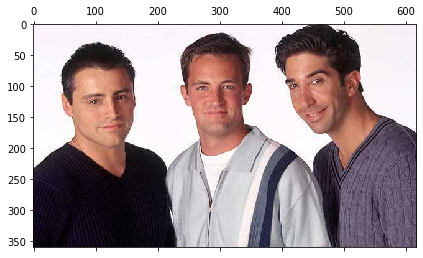

In [22]:
plt.matshow(Img);
plt.show()

In [30]:
Blue = copy.deepcopy(Img)
Red = copy.deepcopy(Img)
Green = copy.deepcopy(Img)

In [36]:
Red[:, :, 1:3] = 0
Green[:, :, 0] = 0
Green[:, :, 2] = 0
Blue[:, :, 0] = 0
Blue[:, :, 1] = 0

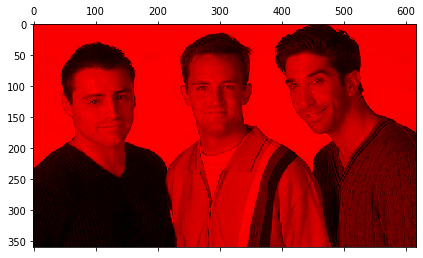

In [39]:
plt.matshow(Red);
plt.show()

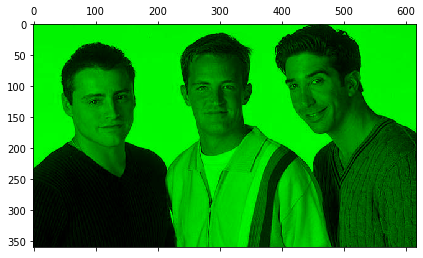

In [40]:
plt.matshow(Green);
plt.show()

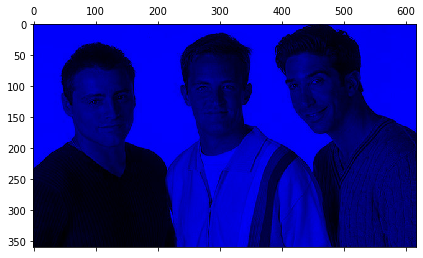

In [41]:
plt.matshow(Blue);
plt.show()

In [45]:
HSV = rgb2hsv(Img)

In [46]:
H = HSV[:, :, 0]
S = HSV[:, :, 1]
V = HSV[:, :, 2]

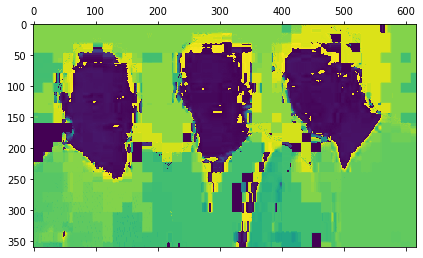

In [49]:
plt.matshow(H);
plt.show()

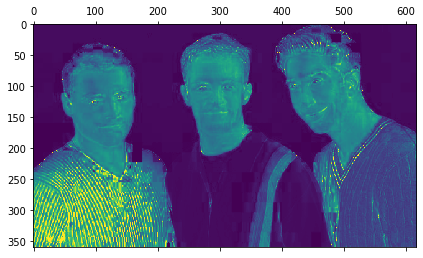

In [50]:
plt.matshow(S);
plt.show()

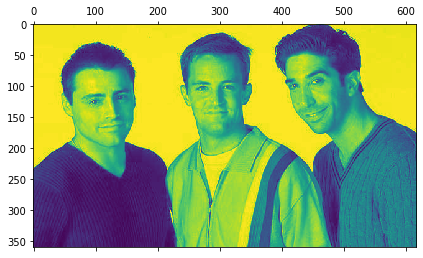

In [51]:
plt.matshow(V);
plt.show()

In [57]:
YCbCr = rgb2ycbcr(Img)
Y = YCbCr[:, :, 0]
Cb = YCbCr[:, :, 1]
Cr = YCbCr[:, :, 2]

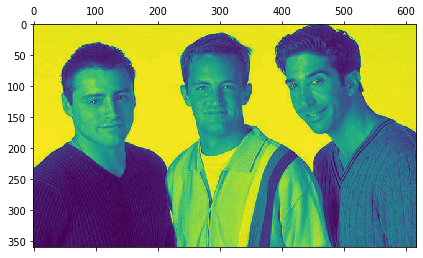

In [58]:
plt.matshow(Y);
plt.show()

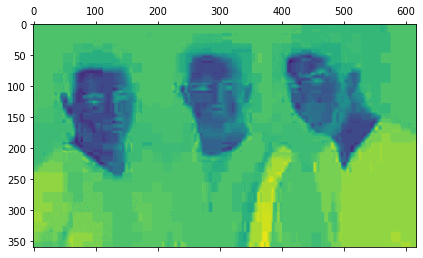

In [59]:
plt.matshow(Cb);
plt.show()

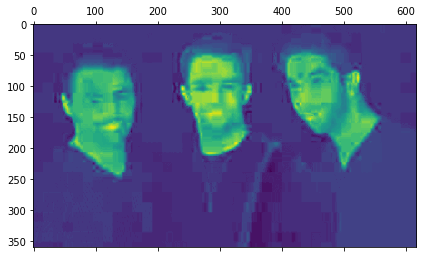

In [60]:
plt.matshow(Cr);
plt.show()

In [62]:
Grey = rgb2gray(Img)

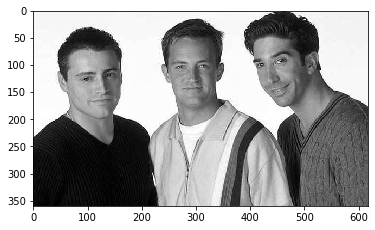

In [64]:
plt.imshow(Grey, cmap="gray")
plt.show()

In [119]:
sum_RGB = Img[:, :, 0].astype('float64') + Img[:, :, 1].astype('float64') + Img[:, :, 2].astype('float64')


In [120]:
Img[:, :, 0] += (sum_RGB == 0)
Img[:, :, 1] += (sum_RGB == 0)
Img[:, :, 2] += (sum_RGB == 0)
sum_RGB += 3*(sum_RGB == 0)

In [121]:
r = np.divide(Img[:, :, 0], sum_RGB) 
g = np.divide(Img[:, :, 1], sum_RGB)
b = np.divide(Img[:, :, 2], sum_RGB)

In [142]:
new_r = r.reshape(-1)
new_g = g.reshape(-1)

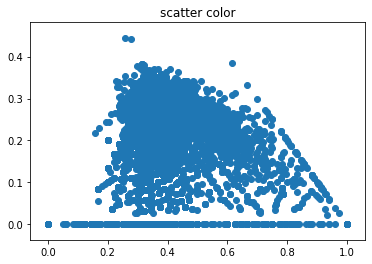

In [143]:
plt.scatter(new_r, new_g)
plt.title('scatter color')
plt.show()

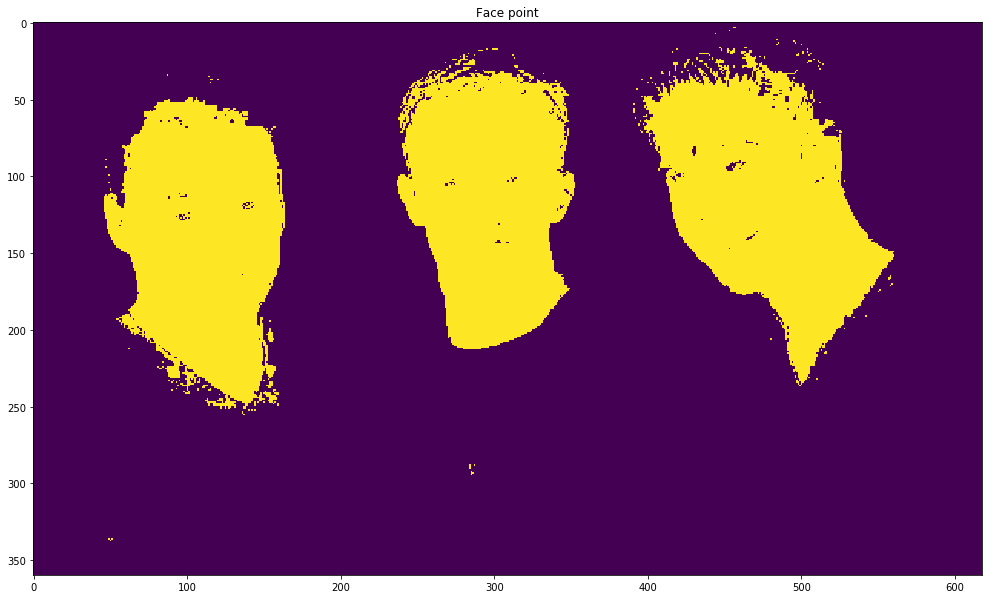

In [146]:
mask = np.zeros((Img.shape[:-1]), dtype=np.uint8)
mask[(r > 0.4) & (g > 0.2)]  = 1 
plt.subplots(figsize=(17, 15))
plt.title('Face point')
plt.imshow(mask)

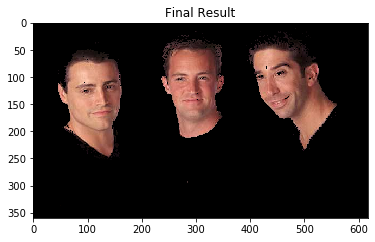

In [147]:
mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
plt.title('Final Result')
plt.imshow(Img*mask)